# Making a function to export any single NEON site

In [1]:
# Import required libraries here
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [2]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Create path for dataframes with NDVI calculations 
outputs_path = os.path.join("data", "nature-serve", "outputs")

In [3]:
def NEON_site_extent(path_to_NEON_boundaries, site_polygon_path, site):
    '''Will write a NEON site extent shape file per NEON
    site as long as the original NEON site extent shape 
    file contains a column named 'siteID'.

    Parameters
    ----------
    path_to_NEON_boundaries : str
        The path to a shape file that contains the list
        of all NEON site extents, also known as field
        sampling boundaries (can be found at NEON and
        ESRI sites)
        
    site_polygon_path : str
        The path to a new shapefile containing a single 
        polygon of the site specified that will be stored
        in an output directory already in existance, or 
        will be made.
        
    site : str
        One siteID contains 4 capital letters, 
        e.g. CPER, HARV, ONAQ or SJER.
        
    Returns
    -------
    site_boundary_crop : GeoDataFrame
        A new shapefile containing a single polygon 
        per the site specified.        
    '''
    # Create output directory, if needed
    if not os.path.exists(outputs_path):
        os.mkdir(outputs_path)
    
    # Import all NEON site extent boundaries, index by site
    NEON_boundaries = gpd.read_file(path_to_NEON_boundaries)
    boundaries_indexed = NEON_boundaries.set_index(['siteID'])
    
    # Index site of interest and write new .shp file
    site_boundary = boundaries_indexed.loc[[site]]
    site_boundary.reset_index(inplace=True)
    
    site_boundary_crop = site_boundary.to_file(site_polygon_path)
    
    return site_boundary_crop

In [4]:
# Create path to NEON sites boundaries .shp
NEON_boundary_path = os.path.join('data', 
                                    'nature-serve', 'NEON', 
                                    'fieldSamplingBoundaries',
                                    'terrestrialSamplingBoundaries.shp')

# Create path to new shapefile with single site polygon
####################### I'M DOING BOTH SITES TO TEST TEH PLOTTING BELOW ##################
new_ONAQ_path = os.path.join(outputs_path, 'ONAQ_boundary_crop.shp')
new_CPER_path = os.path.join(outputs_path, 'CPER_boundary_crop.shp')

# Run NEON_site_extent function
NEON_site_extent(NEON_boundary_path, new_ONAQ_path, 'ONAQ')
NEON_site_extent(NEON_boundary_path, new_CPER_path, 'CPER')

{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


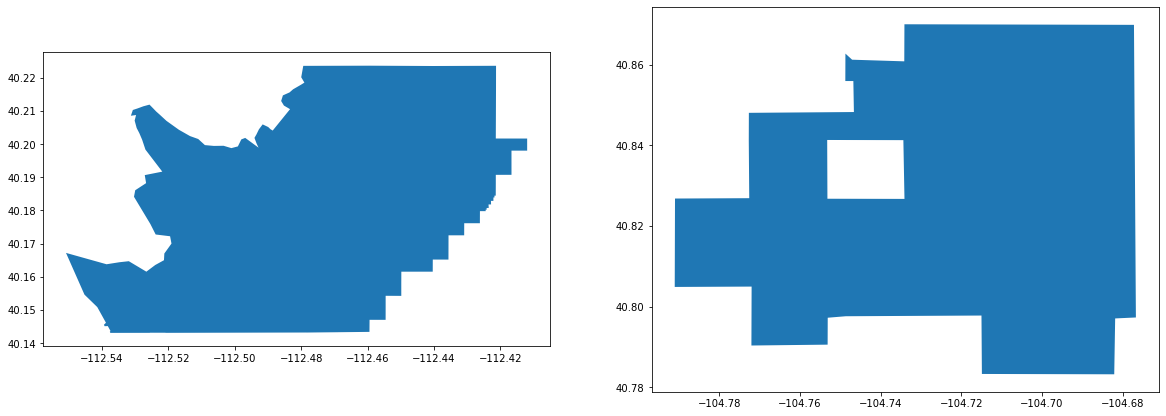

In [7]:
# TEST FUNCTION: read new .shp files back in and plot
ONAQ_boundary_crop = gpd.read_file(new_ONAQ_path)
CPER_boundary_crop = gpd.read_file(new_CPER_path)

print(ONAQ_boundary_crop.crs)
print(CPER_boundary_crop.crs)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (20,10))
ONAQ_boundary_crop.plot(ax=ax1)
CPER_boundary_crop.plot(ax=ax2)
plt.show()